In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
import matplotlib.cm as cm
from sklearn import linear_model
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [240]:
df = pd.read_csv('Corrected_Data.csv',encoding='latin-1') 

In [241]:
df

,MinOrder,City,Name,Delivery_Min,Delivery_Max,Delivery_Money,Money,Sushi,Burger,Salad,...,Ice_cream,Brunch,Hummus,Crepe,Asian,Homemade,Meat_fish,Kids_meals,Kids,Rate
0,50,0,Burger King | Ashdod,20.0,30.0,12,3,0,1,0,...,0,0,0,0,0,0,0,0,0,8.0
1,50,0,Ruben | Ashdod,25.0,35.0,12,2,0,1,0,...,0,0,0,0,0,0,0,0,0,8.2
2,50,0,Schnitzel Factory,30.0,40.0,16,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.6
3,50,0,Pita Basta | Ashdod,20.0,30.0,12,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.4
4,50,0,Del Pesto | Sea Mall,30.0,40.0,16,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,50,11,B Burger | Yavne,20.0,30.0,12,2,0,1,0,...,0,0,0,0,0,0,0,0,0,8.6
2023,50,11,Ami's Hummus,20.0,30.0,14,3,0,0,1,...,0,0,1,0,0,0,0,0,0,9.2
2024,50,11,Haderech Lalehem | Yavne,20.0,30.0,10,2,0,0,1,...,0,0,0,0,0,0,0,0,0,8.8
2025,50,11,CafÃÂ© Greg | Yavne,20.0,30.0,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,8.2


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MinOrder        2027 non-null   int64  
 1   City            2027 non-null   int64  
 2   Name            2027 non-null   object 
 3   Delivery_Min    2027 non-null   float64
 4   Delivery_Max    2027 non-null   float64
 5   Delivery_Money  2027 non-null   int64  
 6   Money           2027 non-null   int64  
 7   Sushi           2027 non-null   int64  
 8   Burger          2027 non-null   int64  
 9   Salad           2027 non-null   int64  
 10  Kebab           2027 non-null   int64  
 11  Pizza           2027 non-null   int64  
 12  Fish            2027 non-null   int64  
 13  Sandwitch       2027 non-null   int64  
 14  Steak           2027 non-null   int64  
 15  Cafe            2027 non-null   int64  
 16  Street_Food     2027 non-null   int64  
 17  Healthy         2027 non-null   i

In [203]:

data = df.columns[df.columns != 'Name']
df_copy=df[data].copy()
for i in  df_copy.columns:
    df_copy[i]=df_copy[i].astype(np.float64)
    

In [204]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MinOrder        2027 non-null   float64
 1   City            2027 non-null   float64
 2   Delivery_Min    2027 non-null   float64
 3   Delivery_Max    2027 non-null   float64
 4   Delivery_Money  2027 non-null   float64
 5   Money           2027 non-null   float64
 6   Sushi           2027 non-null   float64
 7   Burger          2027 non-null   float64
 8   Salad           2027 non-null   float64
 9   Kebab           2027 non-null   float64
 10  Pizza           2027 non-null   float64
 11  Fish            2027 non-null   float64
 12  Sandwitch       2027 non-null   float64
 13  Steak           2027 non-null   float64
 14  Cafe            2027 non-null   float64
 15  Street_Food     2027 non-null   float64
 16  Healthy         2027 non-null   float64
 17  Pasta           2027 non-null   f

<font color='black'><font size="6">LinearRegression-</font></font> It can be seen that there is no coordination between the properties. We tried to predict the rating of a restaurant according to the properties in the table but we did not succeed, it can be seen from the performance evaluation that we got a very low result.

In [205]:
correlation_df = df.corr()
correlation_df

,MinOrder,City,Delivery_Min,Delivery_Max,Delivery_Money,Money,Sushi,Burger,Salad,Kebab,...,Ice_cream,Brunch,Hummus,Crepe,Asian,Homemade,Meat_fish,Kids_meals,Kids,Rate
MinOrder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,1.000000,0.006292,0.006292,0.114333,-0.066314,0.009710,-0.076403,0.003938,0.008524,...,NaN,-0.011762,-0.000053,-0.049754,0.002686,0.014291,NaN,NaN,-0.033821,0.073430
Delivery_Min,NaN,0.006292,1.000000,1.000000,0.489400,-0.072249,0.162625,-0.023927,0.037889,0.034213,...,NaN,-0.006668,-0.077655,-0.047860,0.130080,-0.005333,NaN,NaN,0.030301,-0.156982
Delivery_Max,NaN,0.006292,1.000000,1.000000,0.489400,-0.072249,0.162625,-0.023927,0.037889,0.034213,...,NaN,-0.006668,-0.077655,-0.047860,0.130080,-0.005333,NaN,NaN,0.030301,-0.156982
Delivery_Money,NaN,0.114333,0.489400,0.489400,1.000000,-0.045667,0.020660,-0.028125,0.018839,0.036794,...,NaN,0.017630,0.005987,-0.012331,0.007543,0.064241,NaN,NaN,-0.003671,-0.038366
Money,NaN,-0.066314,-0.072249,-0.072249,-0.045667,1.000000,-0.217106,-0.126887,-0.076655,-0.011174,...,NaN,-0.014479,0.194408,0.034437,-0.172976,0.032786,NaN,NaN,-0.127432,0.010910
Sushi,NaN,0.009710,0.162625,0.162625,0.020660,-0.217106,1.000000,-0.106137,-0.118269,-0.050395,...,NaN,-0.017859,-0.081921,-0.017859,0.718861,-0.075177,NaN,NaN,0.070568,-0.062806
Burger,NaN,-0.076403,-0.023927,-0.023927,-0.028125,-0.126887,-0.106137,1.000000,-0.051846,0.010795,...,NaN,-0.027001,-0.113641,-0.027001,-0.119071,-0.098818,NaN,NaN,0.238320,-0.158400
Salad,NaN,0.003938,0.037889,0.037889,0.018839,-0.076655,-0.118269,-0.051846,1.000000,-0.061443,...,NaN,0.000631,-0.027202,-0.035924,-0.134154,-0.053899,NaN,NaN,-0.011134,-0.010908
Kebab,NaN,0.008524,0.034213,0.034213,0.036794,-0.011174,-0.050395,0.010795,-0.061443,1.000000,...,NaN,-0.011181,-0.008294,-0.011181,-0.053399,0.023556,NaN,NaN,-0.039350,-0.053860


In [206]:
TRAINING_FEATURES = df.columns[df.columns != 'Name']
df_copy=df[TRAINING_FEATURES].copy()
TRAINING_FEATURES = df_copy.columns[df_copy.columns != 'Rate']
TARGET_FEATURE    = 'Rate'
X = df_copy[TRAINING_FEATURES]
y = df_copy[TARGET_FEATURE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_in_range = min_max_scaler.fit_transform(X_train)
X_test_scaled_in_range = min_max_scaler.transform(X_test)

In [207]:
lr = linear_model.LinearRegression() # create a linear regression object
x = df[TRAINING_FEATURES]
y = df['Rate']
lr.fit(X=x, y=y);

In [208]:
def train_1st_model(X_train, y_train):
    trained_model = linear_model.LinearRegression() 
    trained_model.fit(X=X_train, y= y_train)
    return trained_model


In [209]:
trained_model_1 =train_1st_model(X_train, y_train)

In [210]:
def predict_1nd(trained_1, X_test):
    predicted_vals =trained_1.predict(X_test)
    return predicted_vals

In [211]:
pred_2nd_vals = predict_1nd(trained_model_1, X_test)
y_pred_2nd = pd.Series(pred_2nd_vals,index=X_test.index)

In [212]:
def evaluate_performance_1st(y_test,y_predicted):
    evaluate_value=r2_score(y_test, y_predicted)
    return evaluate_value

In [213]:
eval_res_1st = evaluate_performance_1st(y_test,y_pred_2nd)
print(eval_res_1st )

0.06339184437486223


In [214]:
name_col=df.columns[9:45]


In [215]:
category_sum=zip(df["Sushi"],df["Burger"])
category_list=[x+y for (x,y) in category_sum]
for i in name_col:
    category_sum=zip(category_list,df[i])
    category_list=[x+y for (x,y) in category_sum]
    

In [217]:
delivery_avg=zip(df["Delivery_Min"],df["Delivery_Max"])
delivery_list=[(x+y)/2 for (x,y) in delivery_avg]


<font color='black'><font size="6">Non-guided learning</font></font>After failing in guided learning we decided to try in non-guided learning to cluster the data.We reduced the size by creating a column of the average delivery times and the number of categories in the restaurant and normalized the data.

In [218]:
d={"MinOrder":df["MinOrder"],"City":df["City"],"Delivery_avg":delivery_list,"Delivery_Money":df["Delivery_Money"],
  "Money":df["Money"],"Rate":df["Rate"],"Category_sum":category_list,"Kosher":df["Kosher"]}
X=pd.DataFrame(d)

In [219]:
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)

In [220]:
data_scaled

,MinOrder,City,Delivery_avg,Delivery_Money,Money,Rate,Category_sum,Kosher
0,0.863611,0.000000,0.431805,0.207267,0.051817,0.138178,0.051817,0.017272
1,0.831001,0.000000,0.498600,0.199440,0.033240,0.136284,0.033240,0.016620
2,0.784324,0.000000,0.549027,0.250984,0.031373,0.134904,0.031373,0.015686
3,0.864054,0.000000,0.432027,0.207373,0.034562,0.145161,0.034562,0.017281
4,0.785070,0.000000,0.549549,0.251222,0.031403,0.128751,0.031403,0.000000
...,...,...,...,...,...,...,...,...
2022,0.847828,0.186522,0.423914,0.203479,0.033913,0.145826,0.050870,0.016957
2023,0.839816,0.184759,0.419908,0.235148,0.050389,0.154526,0.050389,0.000000
2024,0.850832,0.187183,0.425416,0.170166,0.034033,0.149747,0.085083,0.017017
2025,0.839153,0.184614,0.419576,0.234963,0.033566,0.137621,0.100698,0.016783


<font color='black'><font size="6">Hierarchical cluster:</font></font> We examined whether the data can be clustered according to properties combinations and in particular with the rating of the restaurant. we chose the most optimal parameters after trying a number of option,After running the method for number of the best clusters, we examined a number of options and came to the conclusion that 25 clusters are the best option.we examined them using the indicet silhouette 

In [221]:
def get_best_linkage_method(X, num_clusters, linkage_options):
    best_score =-1
    for linkage in linkage_options:
        agg_cluster_mod=AgglomerativeClustering(linkage=linkage, n_clusters=num_clusters)
        y_predict = agg_cluster_mod.fit_predict(X)
        score = silhouette_score(X,y_predict)
        if score>best_score:
            best_score = score
            best_linkage=linkage
      
    return best_score, best_linkage


In [222]:
linkage_options = ['single', 'complete', 'average', 'ward']
Max_best_score, Max_best_linkage_method= get_best_linkage_method(data_scaled, 25, linkage_options)
index_max=25
for i in range(26,40):
    best_score, best_linkage_method = get_best_linkage_method(data_scaled, i, linkage_options)
    if best_score>Max_best_score:
        Max_best_score,Max_best_linkage_method=best_score,best_linkage_method
        index_max=i
        
    

In [223]:
print(Max_best_score, Max_best_linkage_method)
print(index_max)

0.3159745474767913 average
30


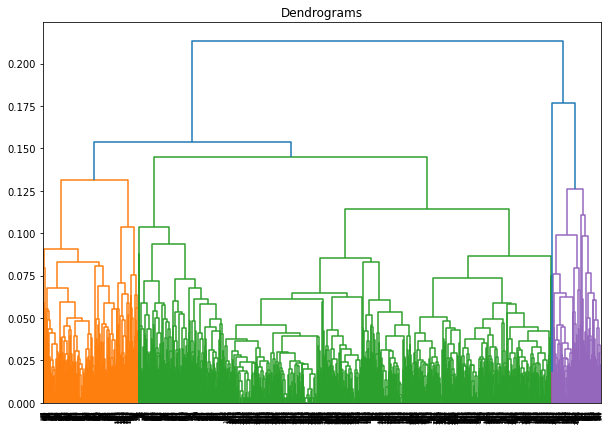

In [224]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method=Max_best_linkage_method))
plt.axhline(y=index_max, color='r', linestyle='--')

In [225]:

model=AgglomerativeClustering(n_clusters=25, affinity='euclidean', linkage="single").fit(df_copy)
pred=model.fit_predict(df_copy)
df_copy[f'CLUSTER_AgglomerativeClustering']=pred
silhouette_score(df_copy, pred)


0.4502267435205905

Text(0, 0.5, 'Money')

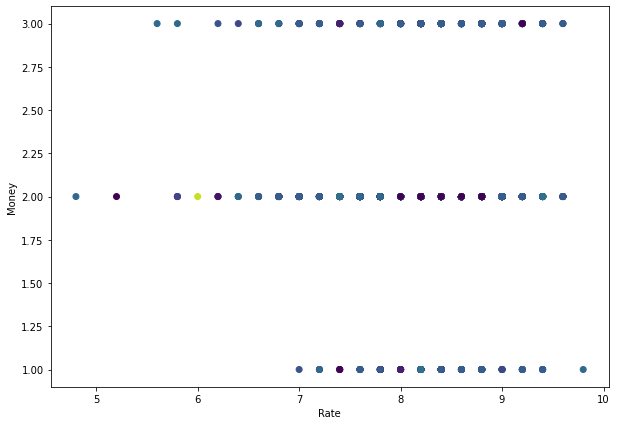

In [229]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_copy['Rate'],df_copy["Money"],c=pred)
plt.xlabel('Rate')
plt.ylabel('Money')    

Text(0, 0.5, 'Kosher')

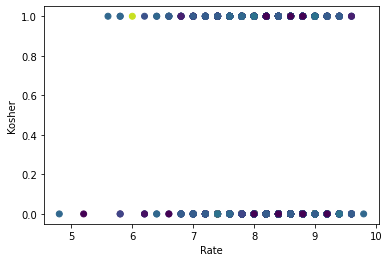

In [230]:
plt.scatter(df_copy['Rate'],df_copy["Kosher"],c=pred)
plt.xlabel('Rate')
plt.ylabel('Kosher')    

Text(0, 0.5, 'Rate')

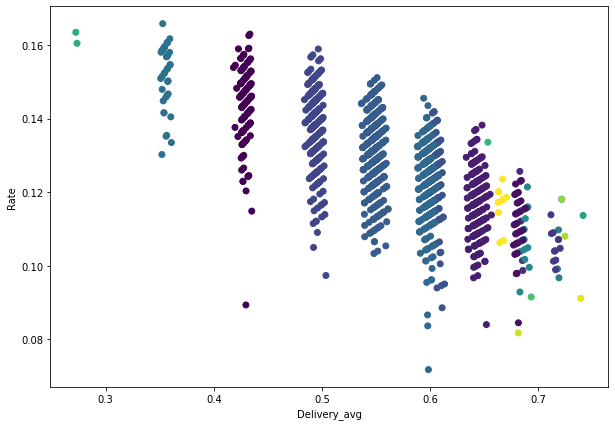

In [231]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Delivery_avg'],data_scaled["Rate"],c=pred)
plt.xlabel('Delivery_avg')
plt.ylabel('Rate')    

<font color='black'><font size="6">K-means:</font></font> We examined whether the data can be clustered according to properties combinations and in particular with the rating of the restaurant.we chose the most optimal K after trying a number of options we examined them using the indices: SEE,silhouette and the elbow method,We have visualized examples of the prediction and it can be seen that in the columns we have added there is a stronger connection than in the original columns

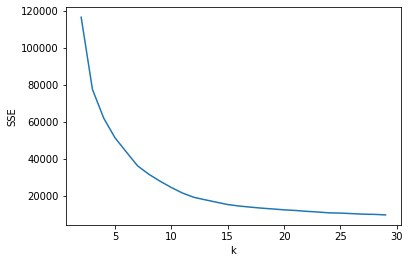

In [232]:

ks = range(2,30)
scores = []
kmeans_per_k=[]
for k in ks:
    km = KMeans(n_clusters=k, n_init=100, init='k-means++', max_iter=100)
    km.fit(df_copy)
    scores.append(km.inertia_)
    kmeans_per_k.append(km)

plt.plot(ks, scores)
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()


best k value: 12
silhouette score: 0.4962959227804955


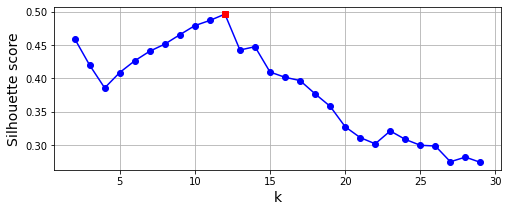

In [79]:
silh_scores=[silhouette_score(df_copy,model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silh_scores)
best_k = ks[best_index]
best_score = silh_scores[best_index]
print("best k value:",best_k)
print("silhouette score:",best_score)

plt.figure(figsize=(8, 3))
plt.grid(True)
plt.plot(ks, silh_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [83]:
k=best_k
model=KMeans(n_clusters=k,random_state=42).fit(df_copy)
pred=model.predict(df_copy)
df_copy[f'CLUSTER_kmeans']=pred
silhouette_score(df_copy, pred)

0.5459831754181551

Text(0, 0.5, 'Rate')

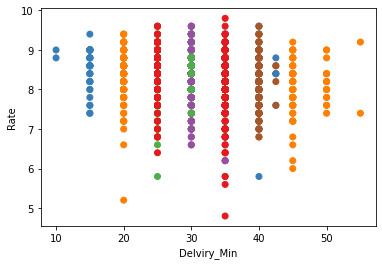

In [167]:

km = KMeans(n_clusters=best_k, n_init=100, init='k-means++', max_iter=100)
plt.scatter(df_copy["Delviry_Min"],df_copy["Rate"], c=pred,  marker="o", cmap=cmap);
plt.xlabel('Delviry_Min')
plt.ylabel('Rate')    

Text(0, 0.5, 'Rate')

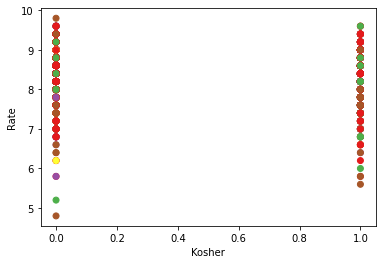

In [237]:
plt.scatter(df_copy["Kosher"],df_copy["Rate"], c=pred,  marker="o", cmap=cmap);
plt.xlabel("Kosher")
plt.ylabel('Rate') 

Text(0, 0.5, 'Rate')

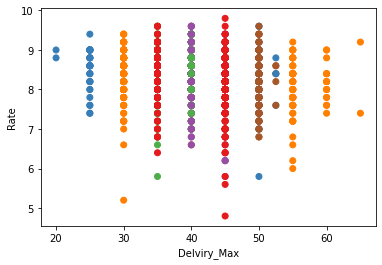

In [168]:
plt.scatter(df_copy["Delviry_Max"],df_copy["Rate"], c=pred,  marker="o", cmap=cmap);
plt.xlabel('Delviry_Max')
plt.ylabel('Rate') 

Text(0, 0.5, 'Rate')

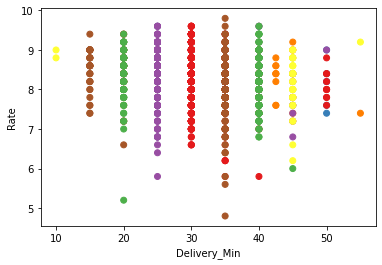

In [242]:
plt.scatter(df_copy["Delivery_Min"],df_copy["Rate"], c=pred,  marker="o", cmap=cmap);
plt.xlabel('Delivery_Min')
plt.ylabel('Rate') 

Text(0, 0.5, 'Rate')

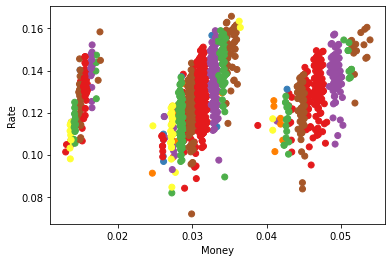

In [236]:
plt.scatter(data_scaled['Money'],data_scaled["Rate"],c=pred,  marker="o", cmap=cmap)
plt.xlabel('Money')
plt.ylabel('Rate') 

Text(0, 0.5, 'Rate')

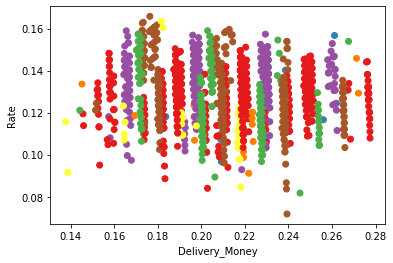

In [235]:
plt.scatter(data_scaled['Delivery_Money'],data_scaled["Rate"],c=pred,  marker="o", cmap=cmap)
plt.xlabel('Delivery_Money')
plt.ylabel('Rate') 

Text(0, 0.5, 'Rate')

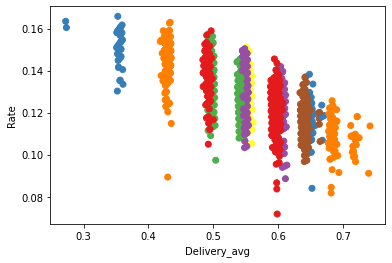

In [172]:
plt.scatter(data_scaled['Delivery_avg'],data_scaled["Rate"],c=pred,  marker="o", cmap=cmap)
plt.xlabel('Delivery_avg')
plt.ylabel('Rate') 

<font color='black'>After examining the properties in front of the rating, we came to the insight that the strongest connection which the restaurants can be clusterd is with an average delivery time and rate

For n_clusters = 2 The silhouette_score is : 0.6108834682538284


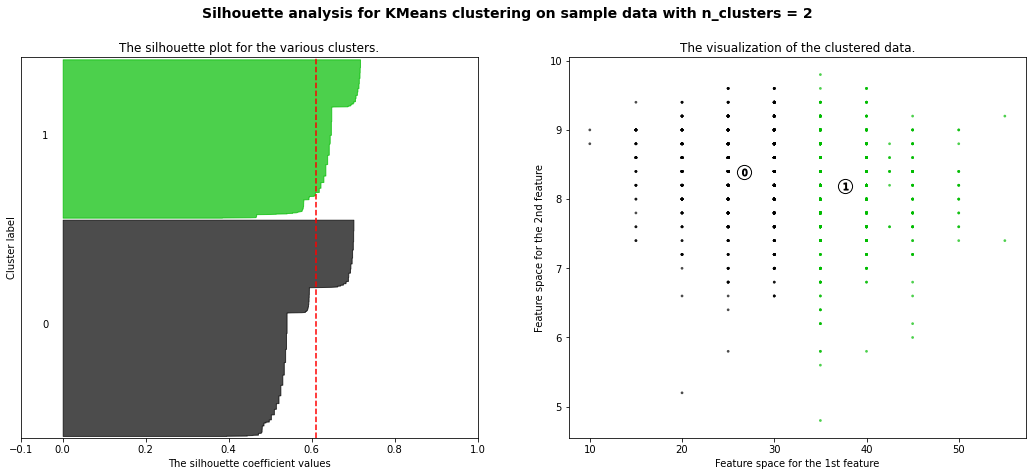

For n_clusters = 3 The silhouette_score is : 0.6242342116461639


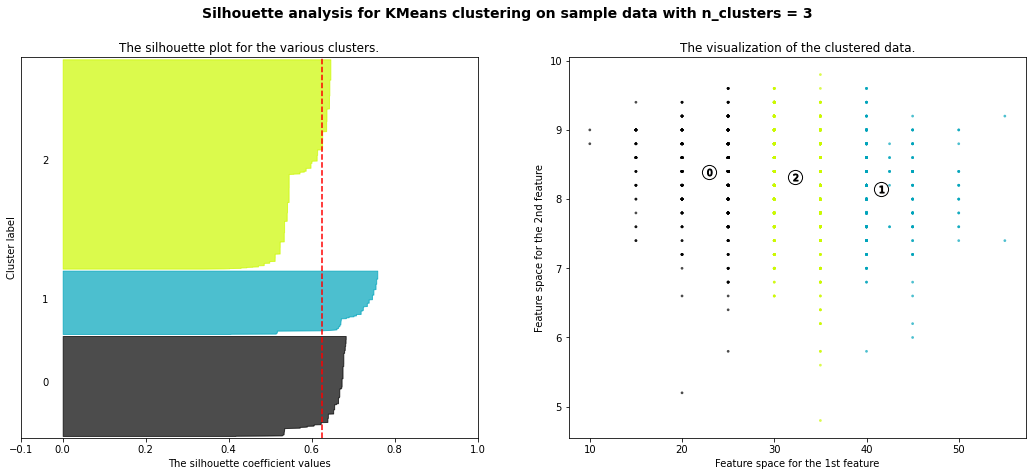

For n_clusters = 4 The silhouette_score is : 0.7294669079774521


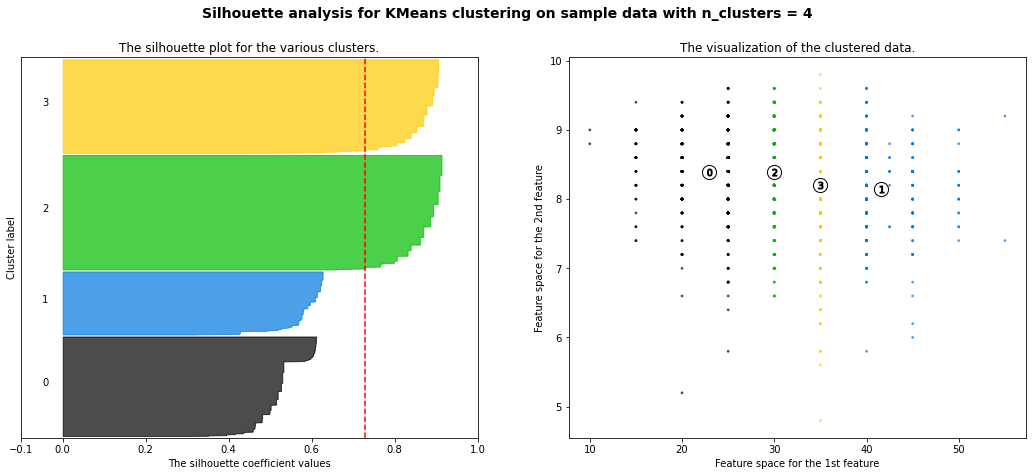

For n_clusters = 5 The silhouette_score is : 0.8019482483034813


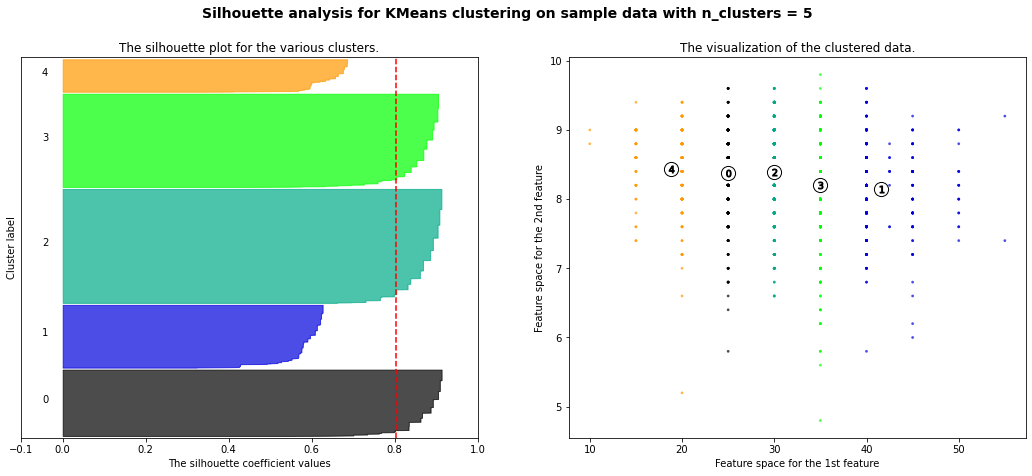

For n_clusters = 6 The silhouette_score is : 0.8362412348275997


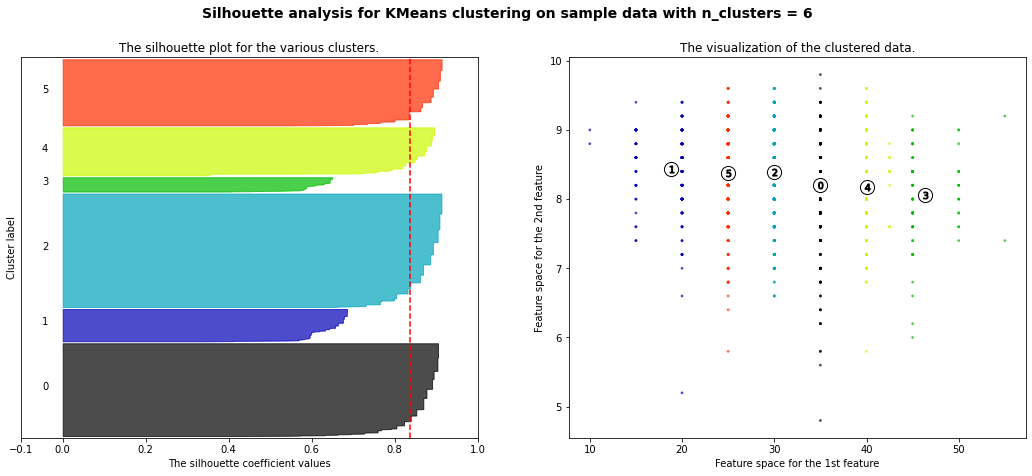

For n_clusters = 7 The silhouette_score is : 0.8560387276324354


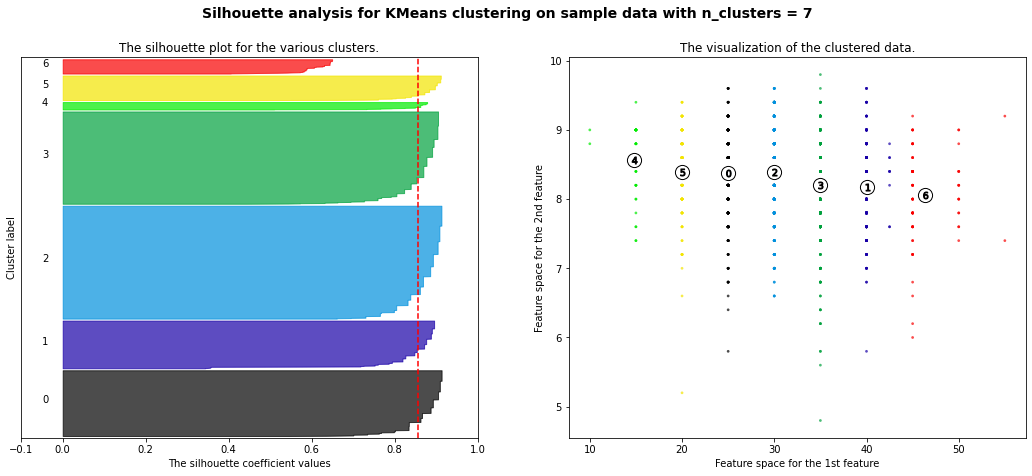

For n_clusters = 8 The silhouette_score is : 0.8629584653764509


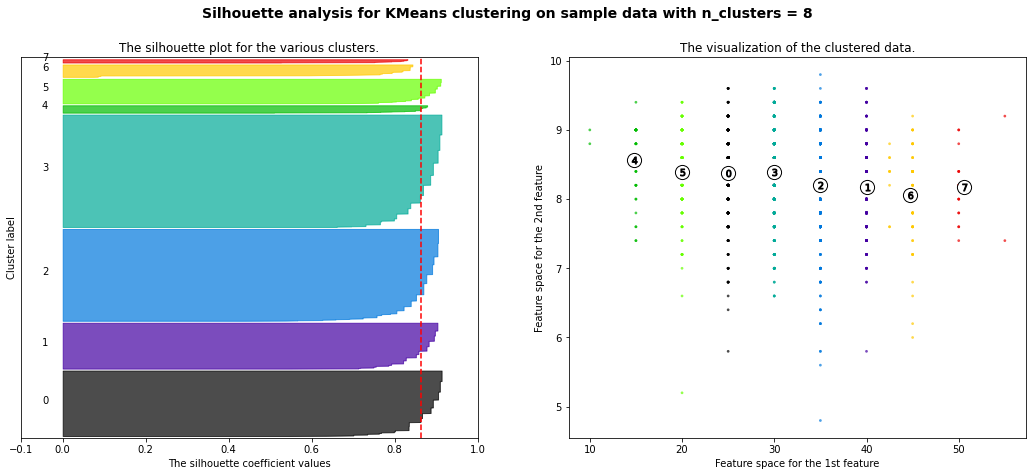

For n_clusters = 9 The silhouette_score is : 0.7919904493455049


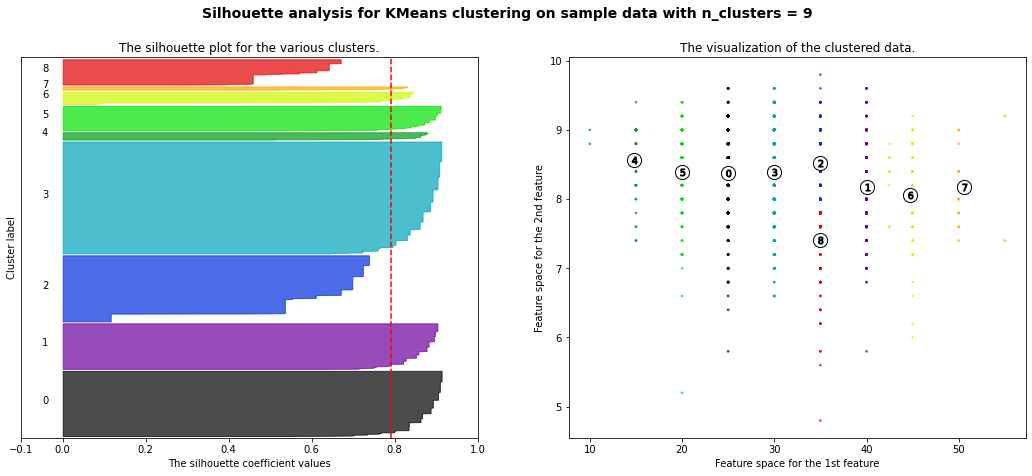

For n_clusters = 2 The silhouette_score is : 0.6108834682297978


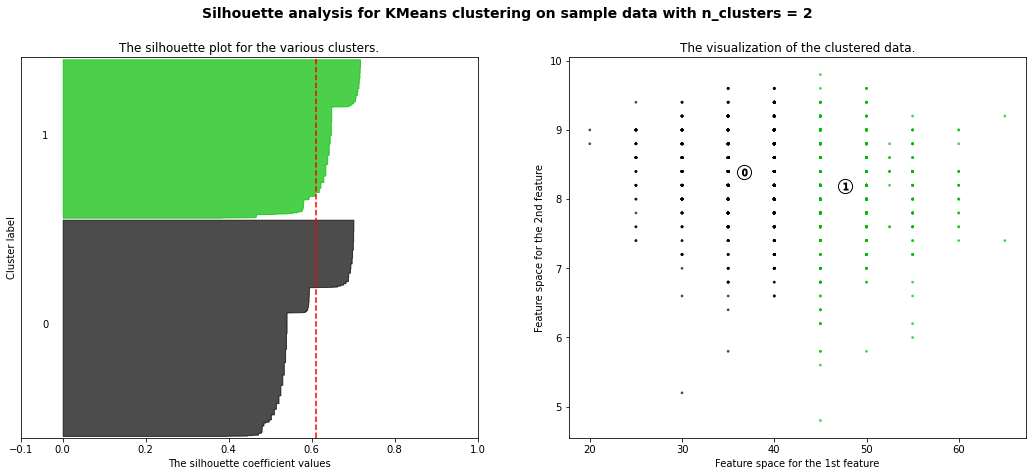

For n_clusters = 3 The silhouette_score is : 0.6242342116200822


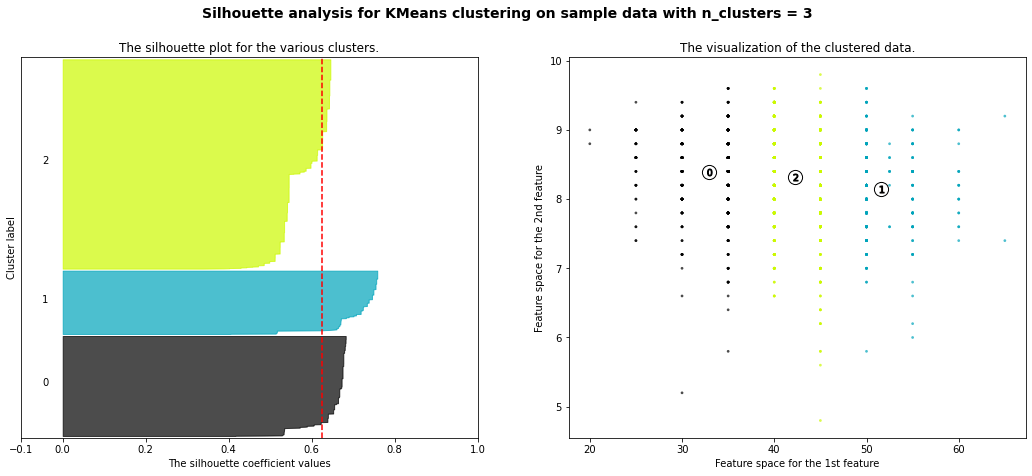

For n_clusters = 4 The silhouette_score is : 0.7294669079110198


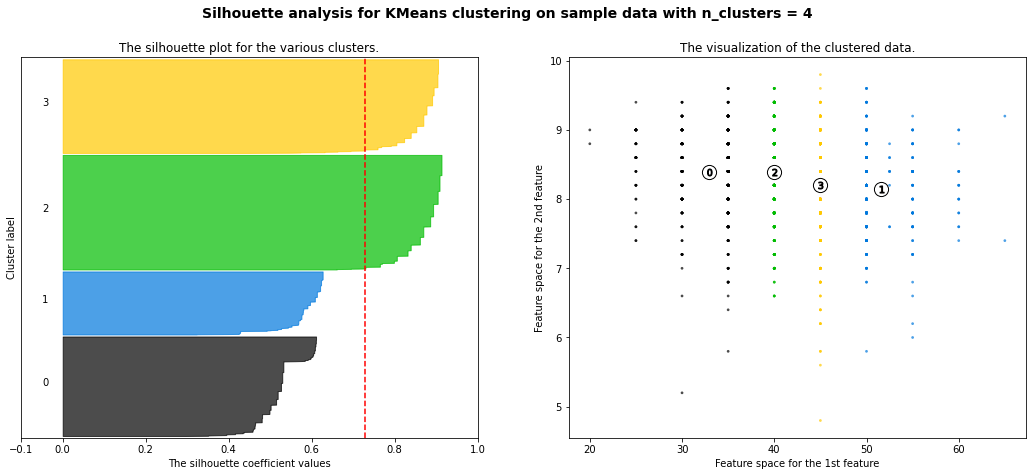

For n_clusters = 5 The silhouette_score is : 0.8019482482383204


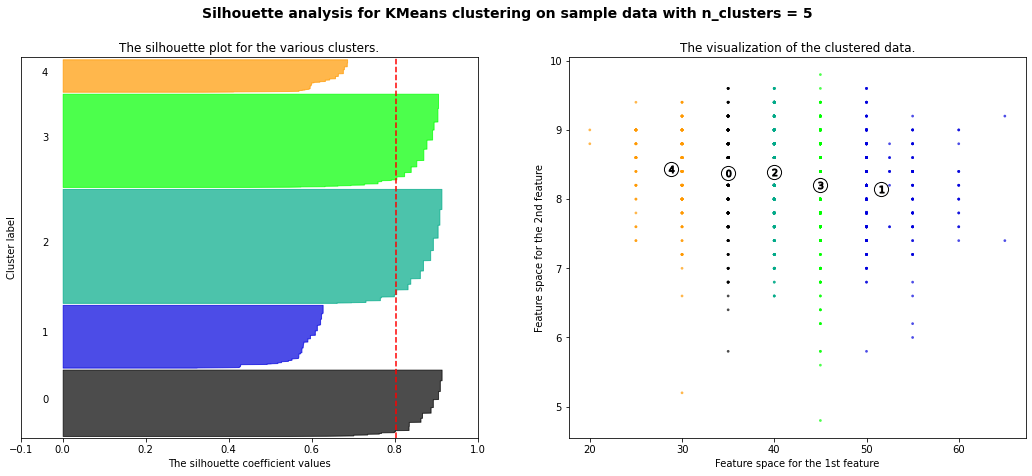

For n_clusters = 6 The silhouette_score is : 0.836241234763571


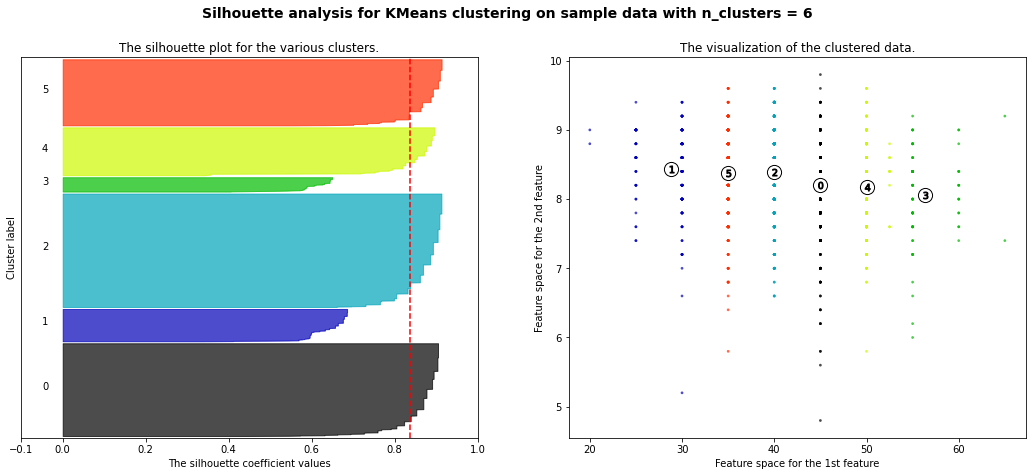

For n_clusters = 7 The silhouette_score is : 0.8560387275695234


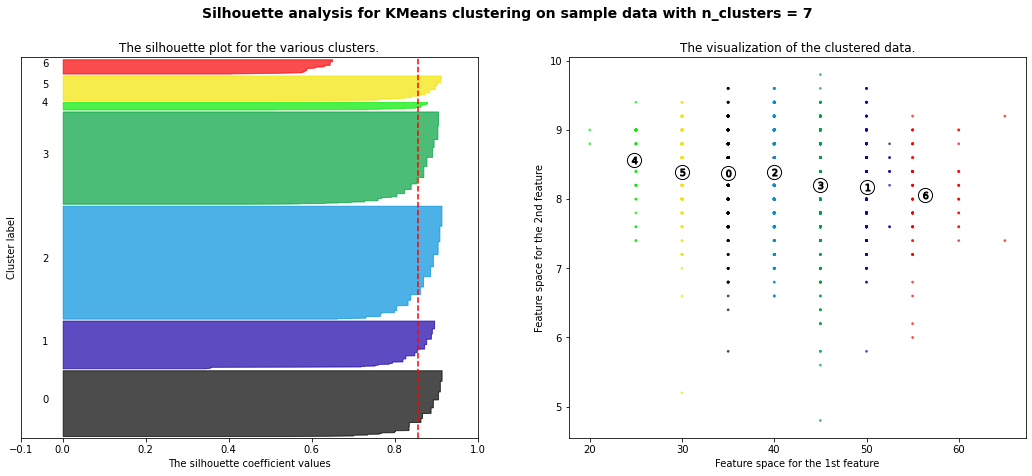

For n_clusters = 8 The silhouette_score is : 0.8629584653139879


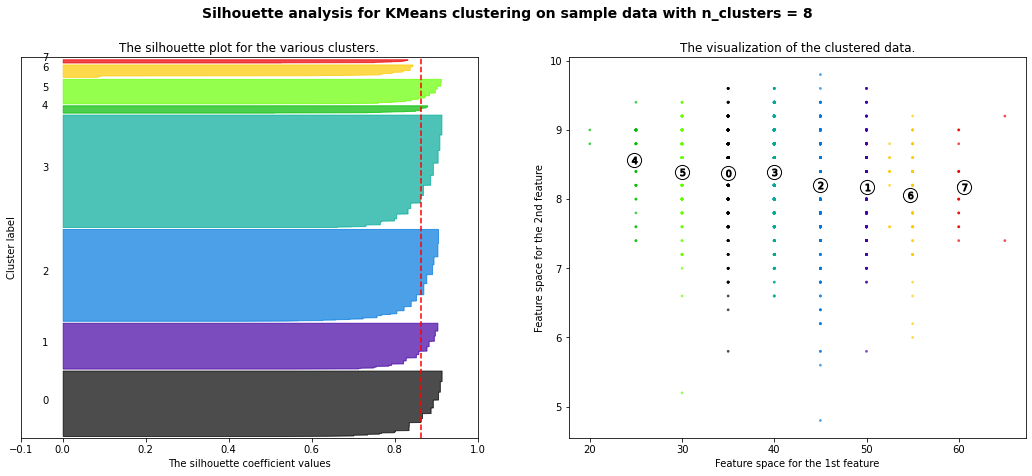

For n_clusters = 9 The silhouette_score is : 0.7919904492921873


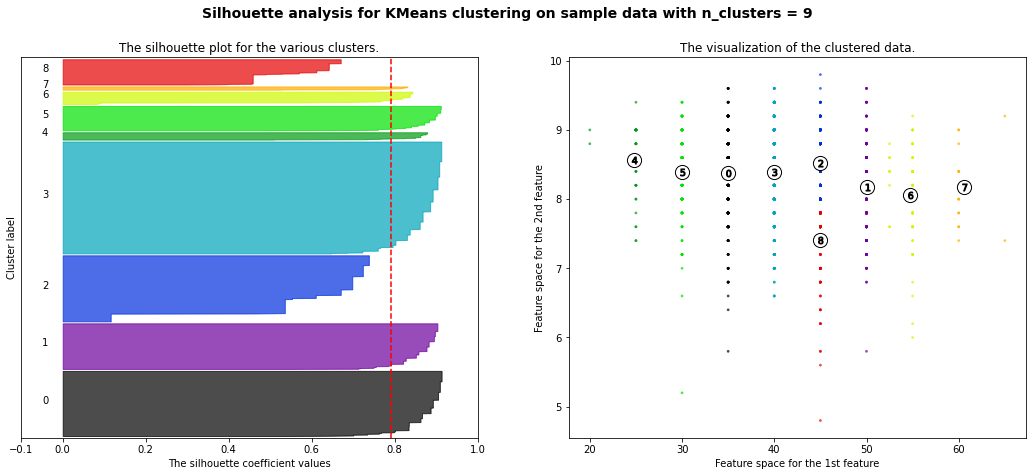

For n_clusters = 2 The silhouette_score is : 0.4946599581608408


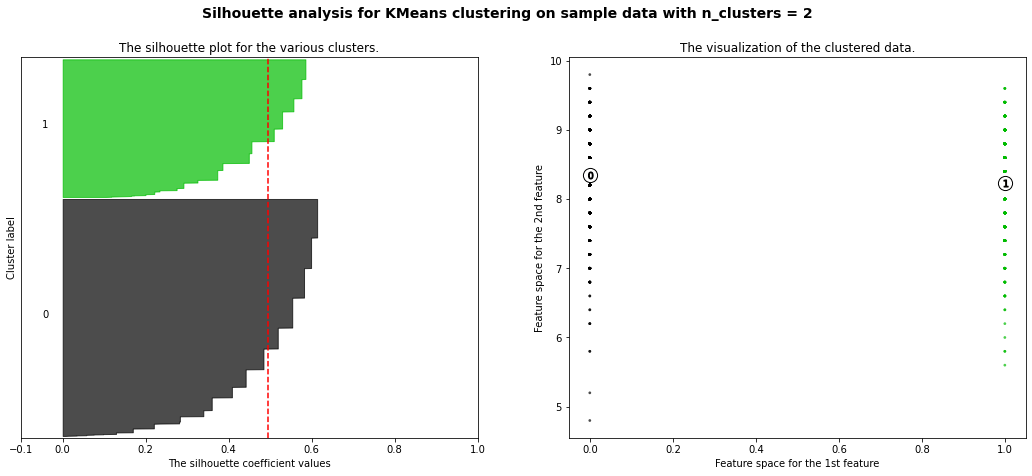

For n_clusters = 3 The silhouette_score is : 0.5156554764704303


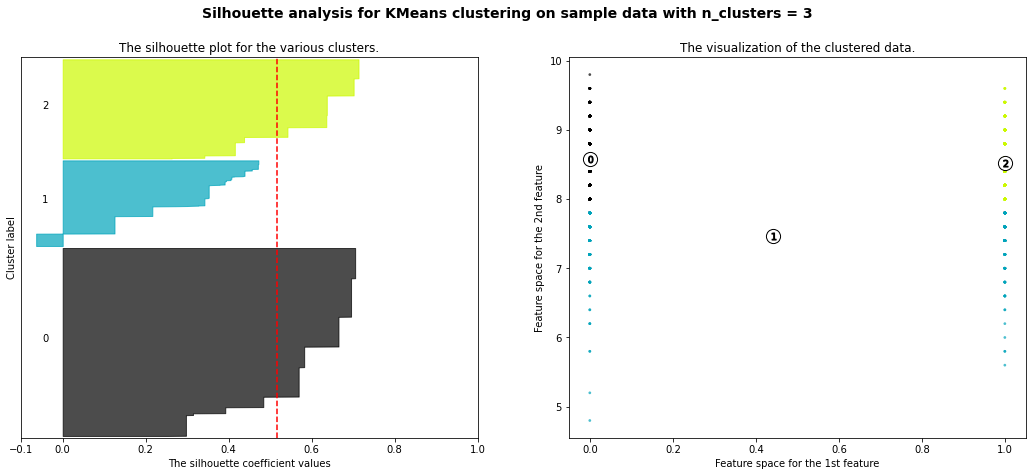

For n_clusters = 4 The silhouette_score is : 0.552856328415328


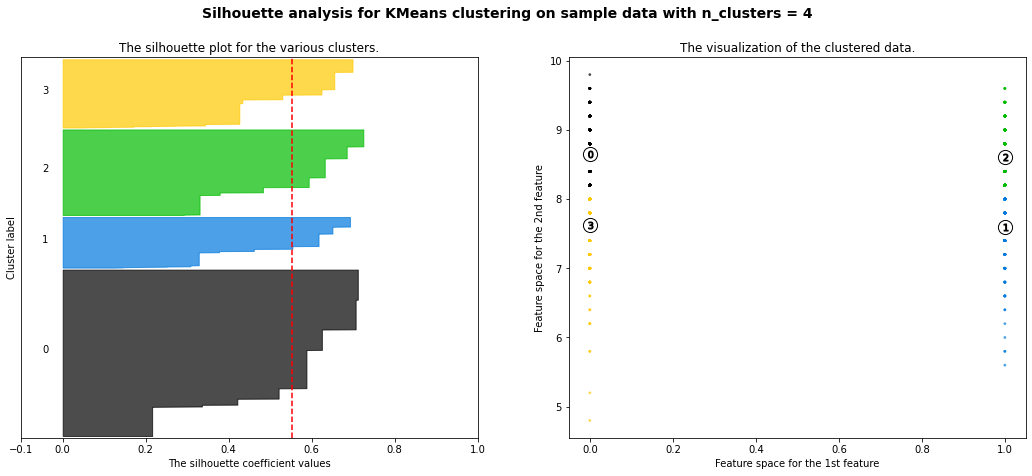

For n_clusters = 5 The silhouette_score is : 0.555537210297726


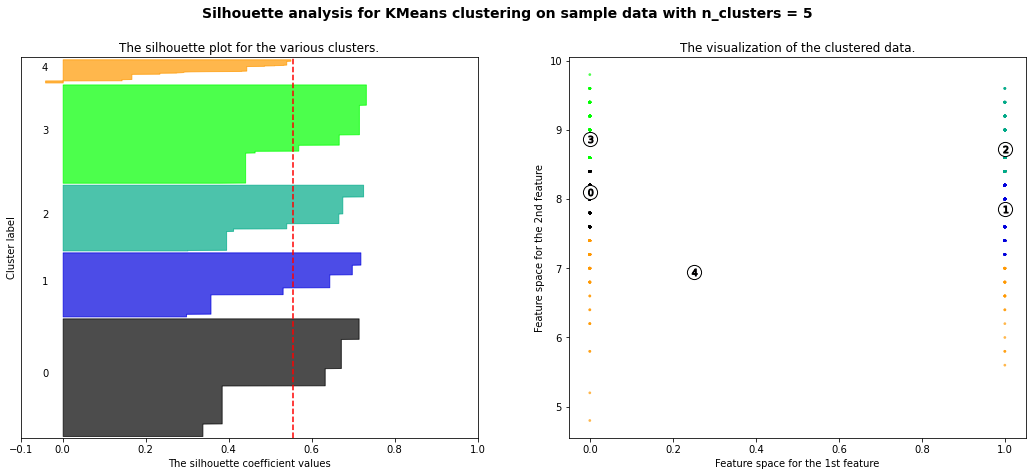

For n_clusters = 6 The silhouette_score is : 0.5662937394499196


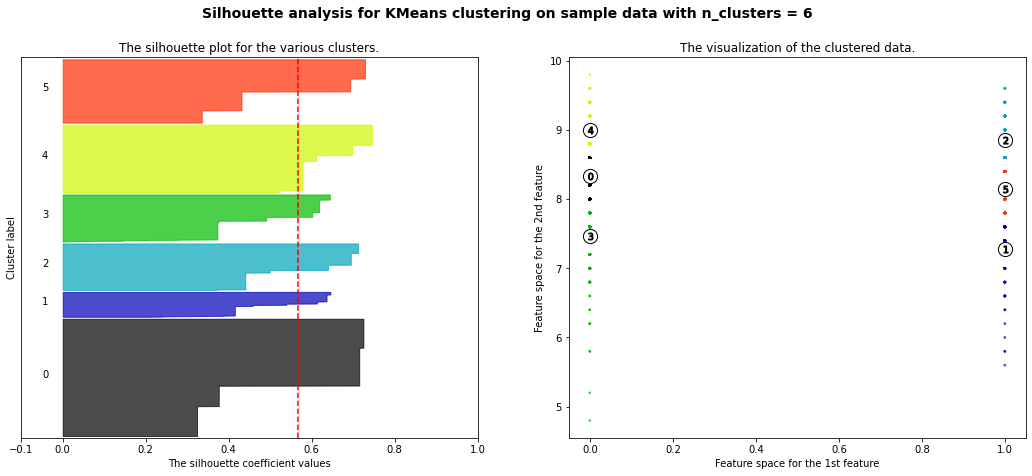

For n_clusters = 7 The silhouette_score is : 0.5834752656671961


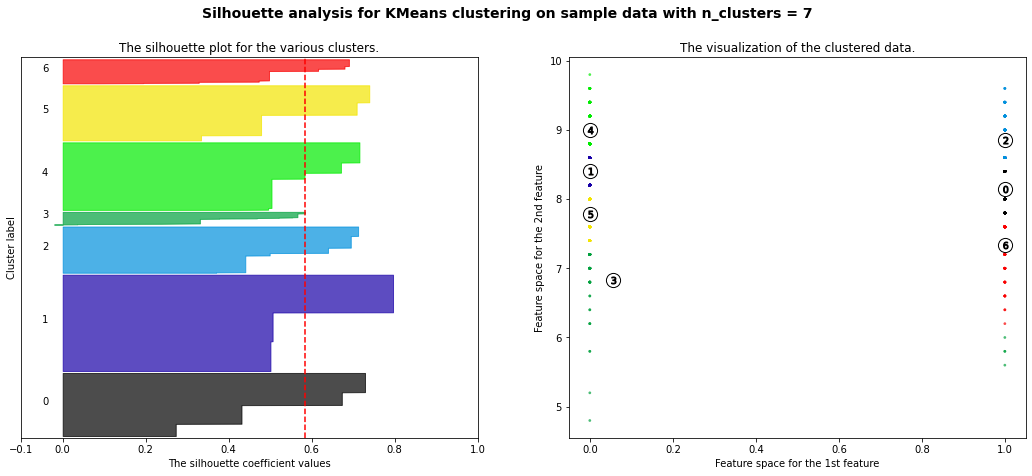

For n_clusters = 8 The silhouette_score is : 0.5828714117498758


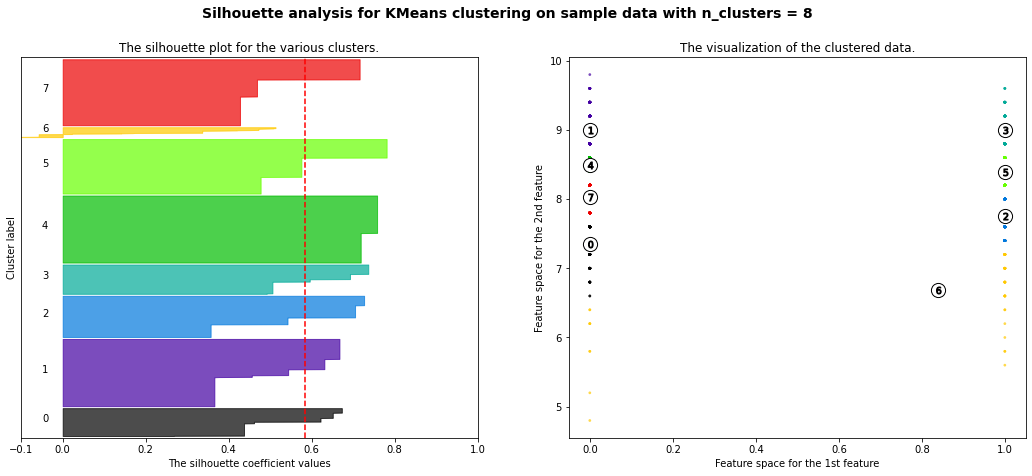

For n_clusters = 9 The silhouette_score is : 0.5941420701217228


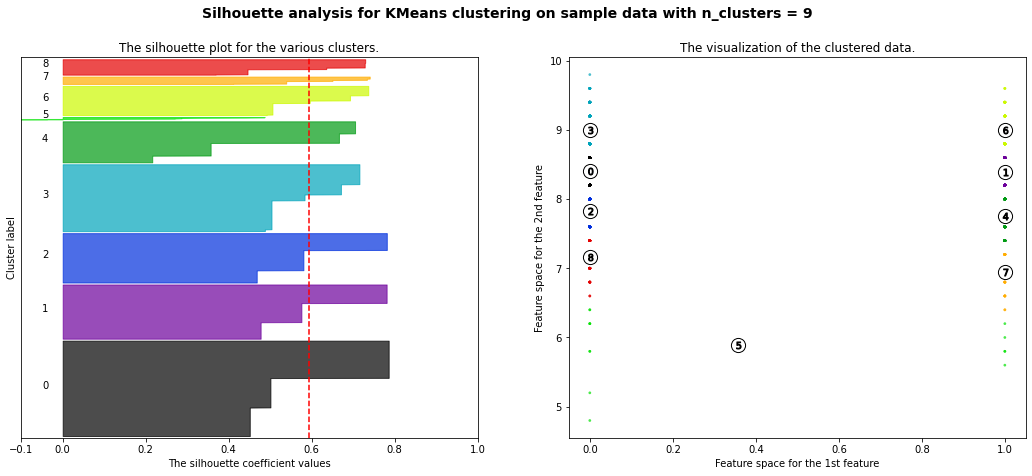

In [182]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
cols=["Delivery_Min","Delivery_Max","Kosher"]
scores=[]
for name_col in cols:
    df_test=pd.DataFrame({name_col:df_copy[name_col],"Rate":df_copy["Rate"]})
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++',random_state=10)
        cluster_labels = clusterer.fit_predict(df_test)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(df_test, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The silhouette_score is :", silhouette_avg)
        scores.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df_test, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette coefficient of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_copy[name_col],df_copy["Rate"], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The silhouette_score is : 0.5705277052713426


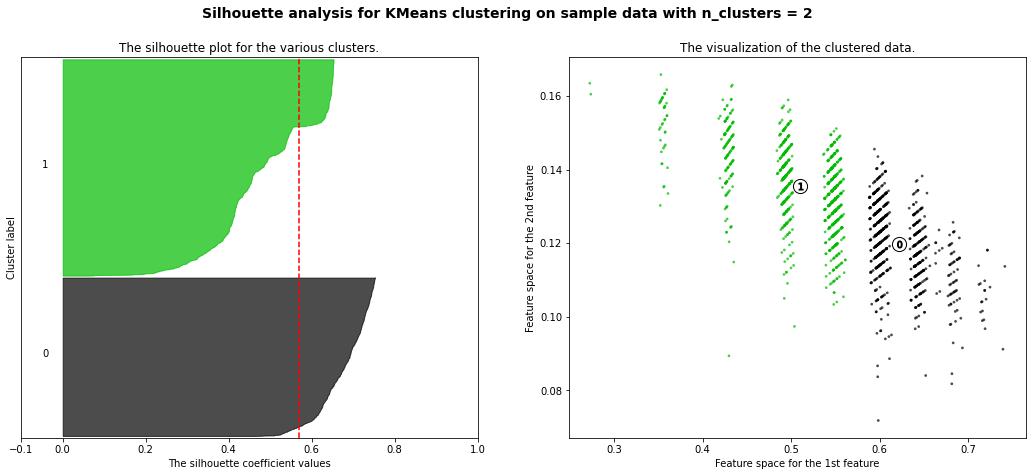

For n_clusters = 3 The silhouette_score is : 0.6080329250760079


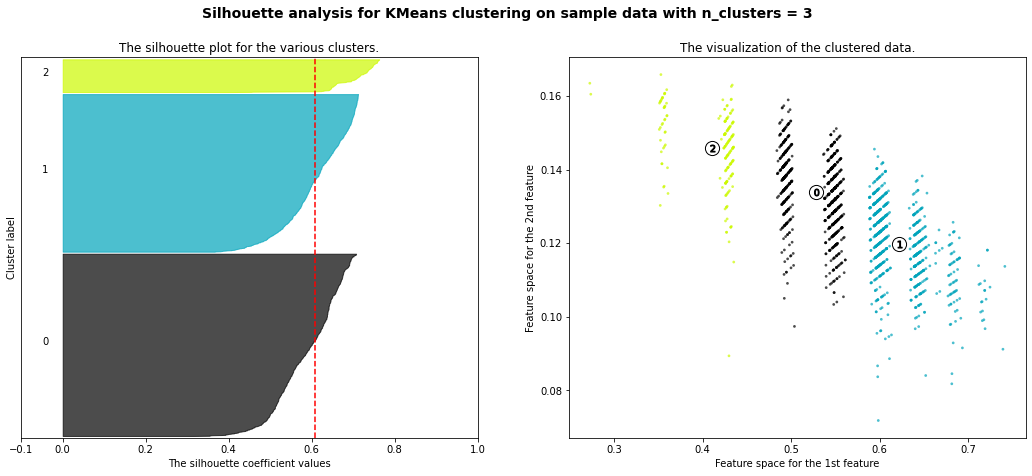

For n_clusters = 4 The silhouette_score is : 0.6417600344989083


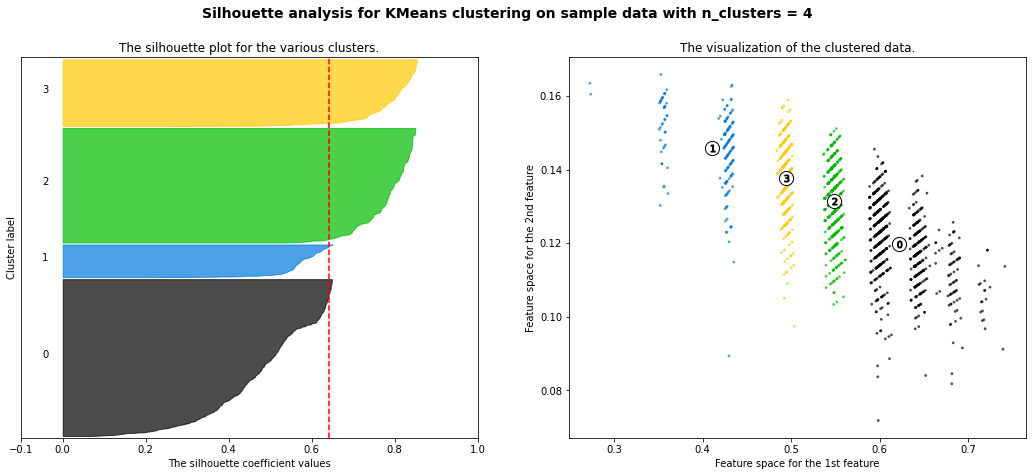

For n_clusters = 5 The silhouette_score is : 0.7070483348134299


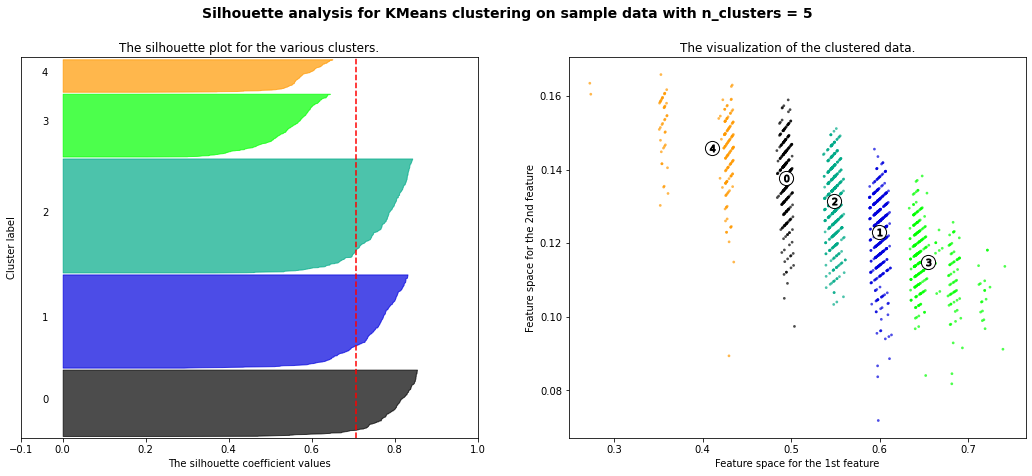

For n_clusters = 6 The silhouette_score is : 0.7277458559551178


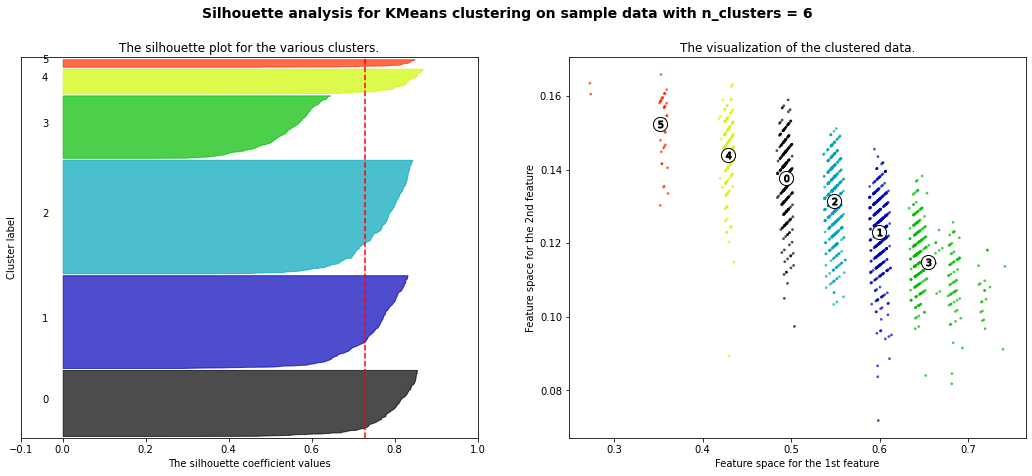

For n_clusters = 7 The silhouette_score is : 0.7420509071836666


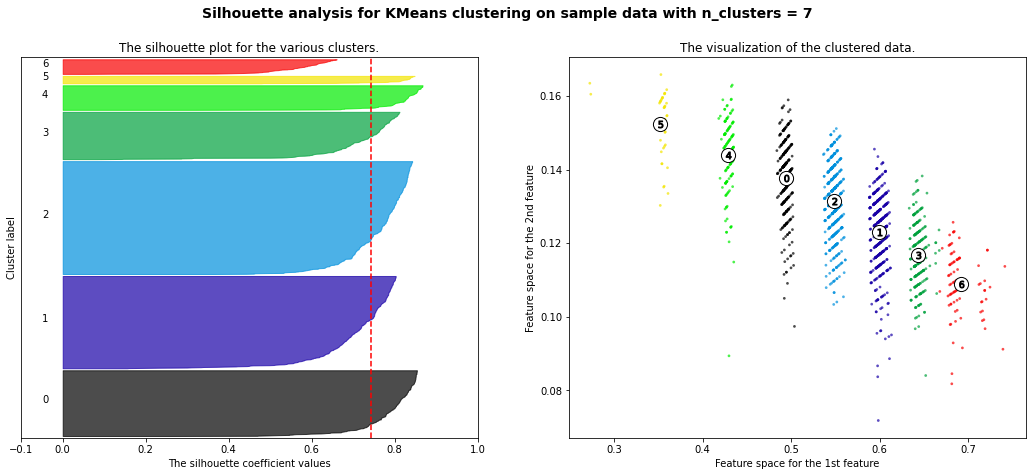

For n_clusters = 8 The silhouette_score is : 0.6346113013862404


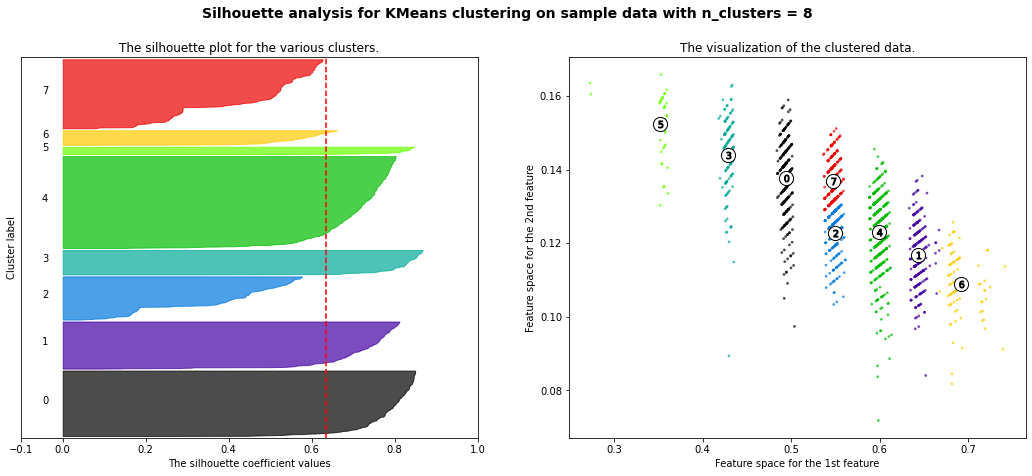

For n_clusters = 9 The silhouette_score is : 0.6344114472574658


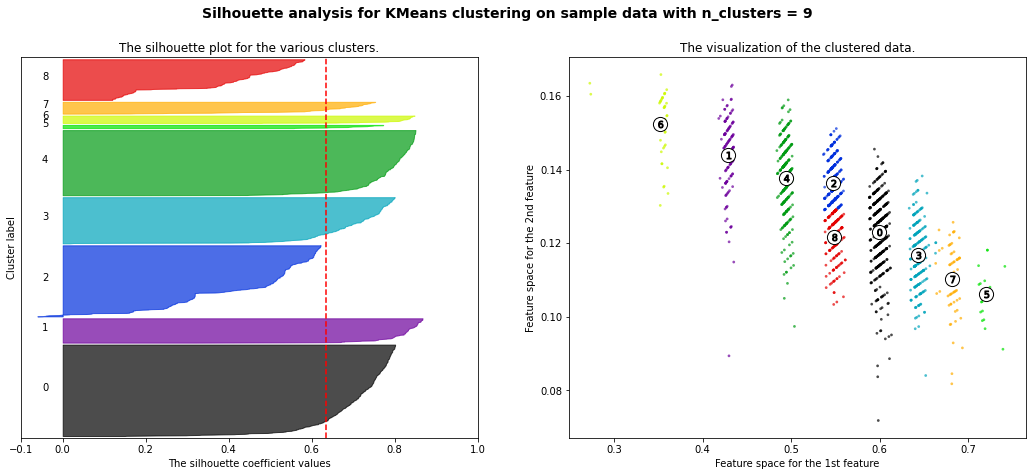

For n_clusters = 2 The silhouette_score is : 0.46771876366395837


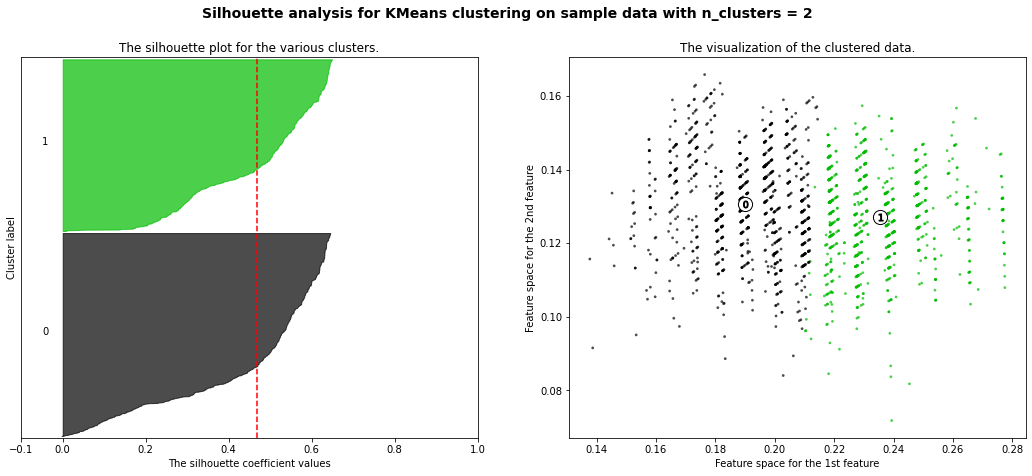

For n_clusters = 3 The silhouette_score is : 0.38162322260082154


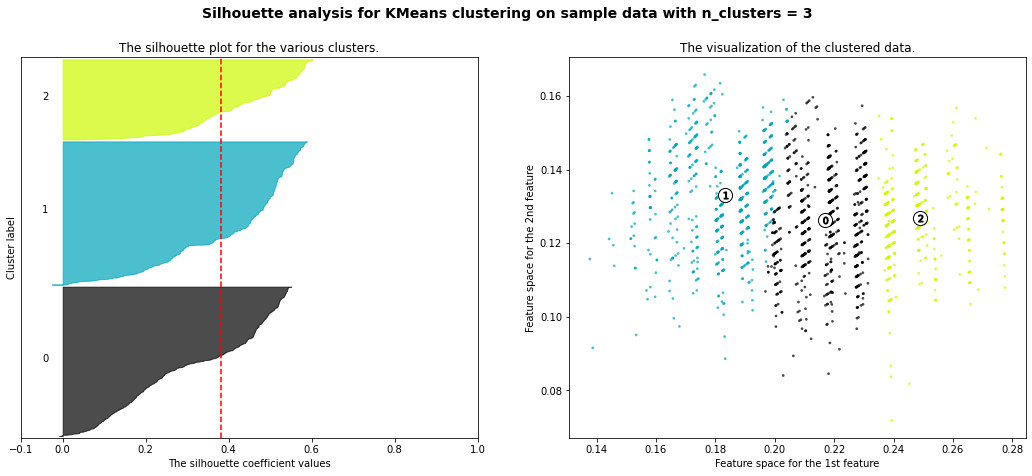

For n_clusters = 4 The silhouette_score is : 0.3728032138195328


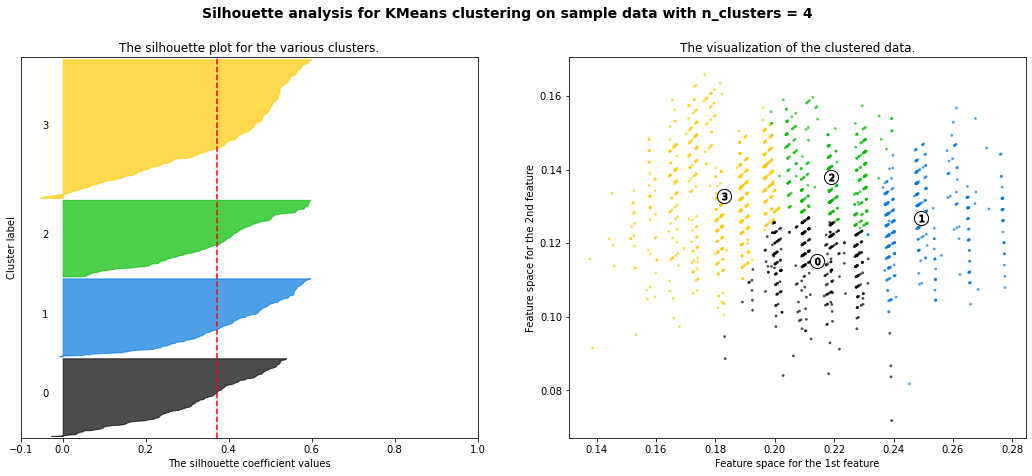

For n_clusters = 5 The silhouette_score is : 0.34121983445065973


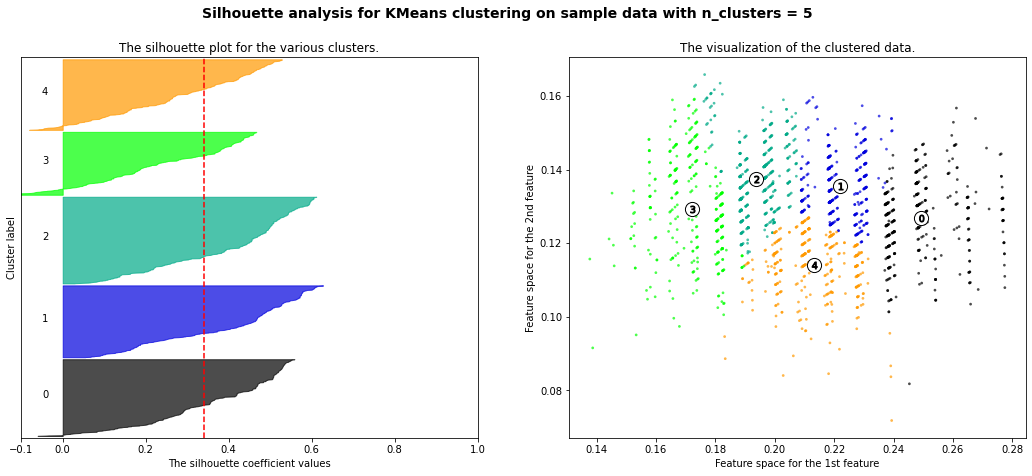

For n_clusters = 6 The silhouette_score is : 0.36136205609331057


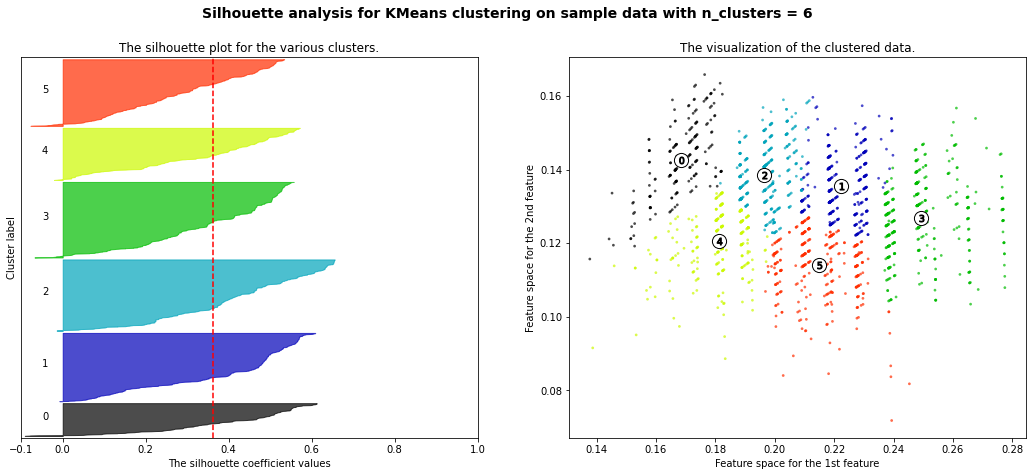

For n_clusters = 7 The silhouette_score is : 0.375276451120638


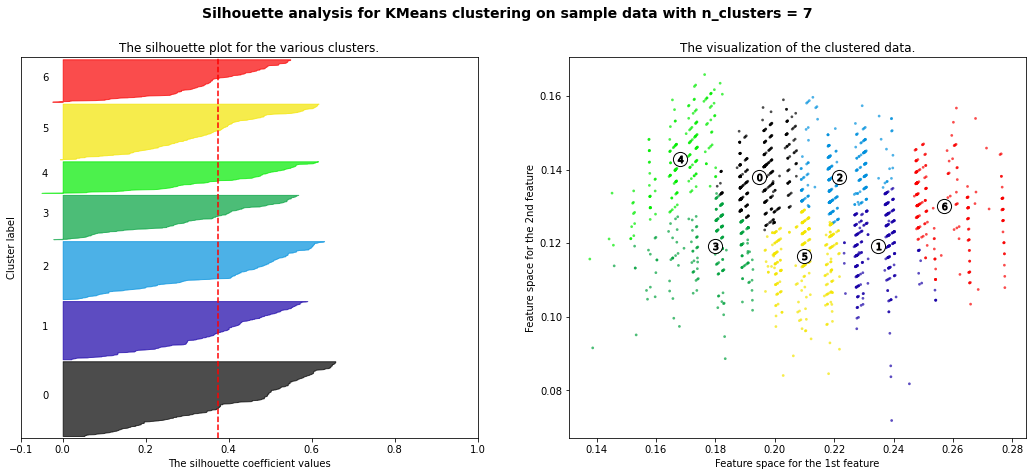

For n_clusters = 8 The silhouette_score is : 0.3776811053458951


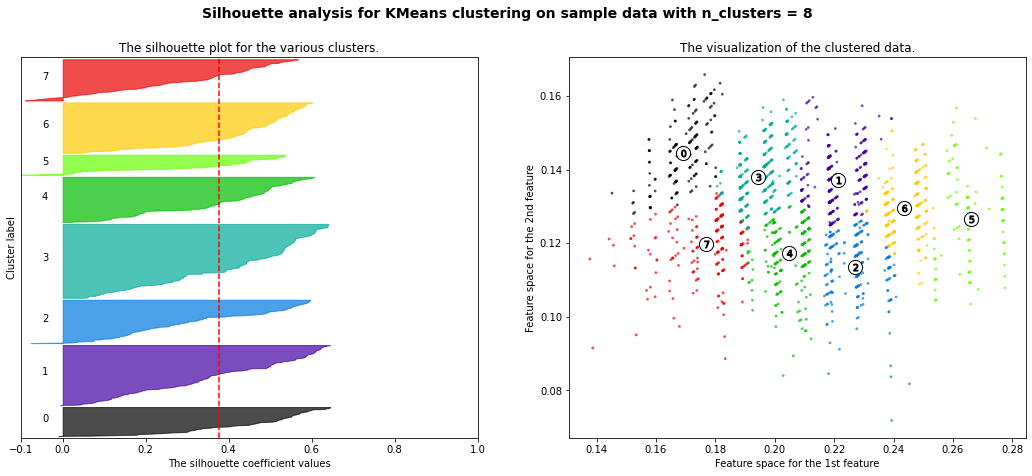

For n_clusters = 9 The silhouette_score is : 0.381472549222734


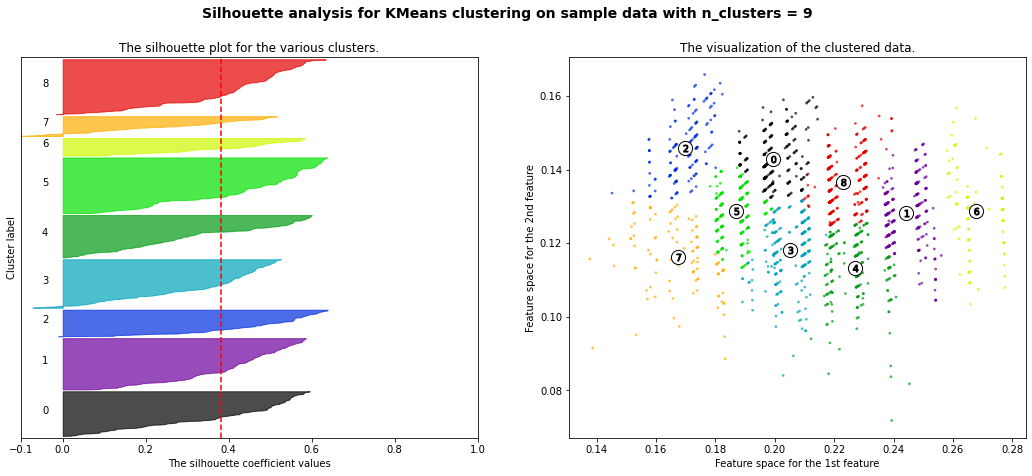

For n_clusters = 2 The silhouette_score is : 0.42041909789460585


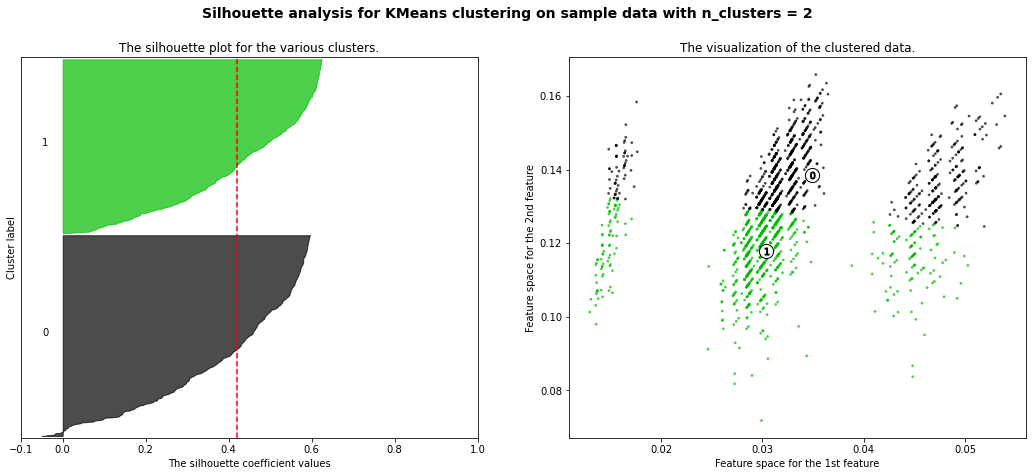

For n_clusters = 3 The silhouette_score is : 0.3569629181823679


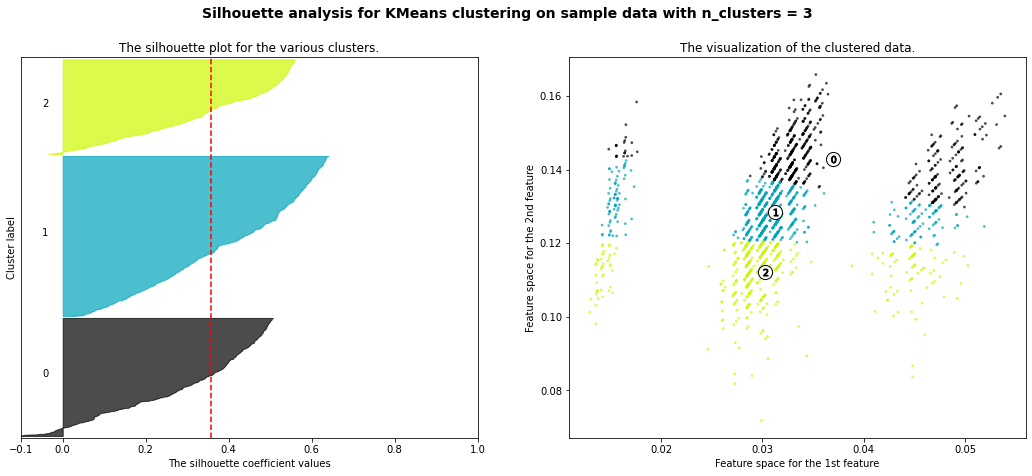

For n_clusters = 4 The silhouette_score is : 0.42713636174731107


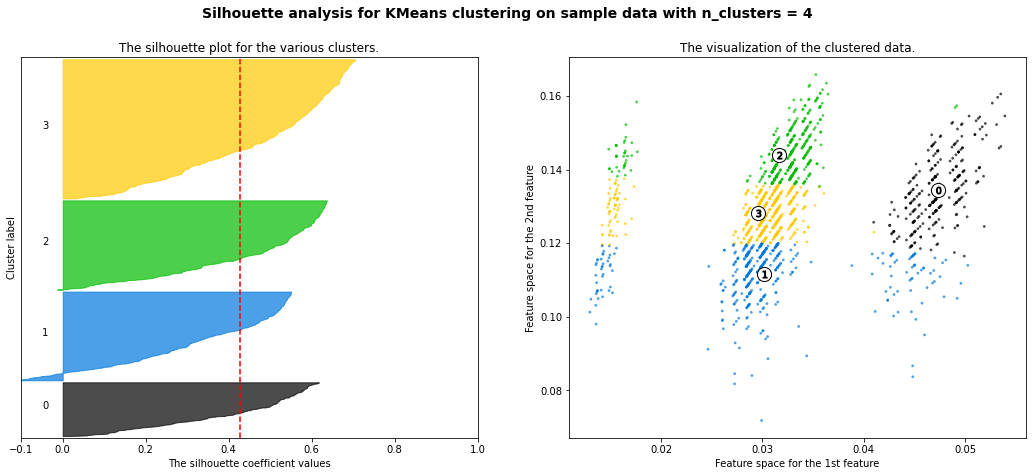

For n_clusters = 5 The silhouette_score is : 0.40249057216173195


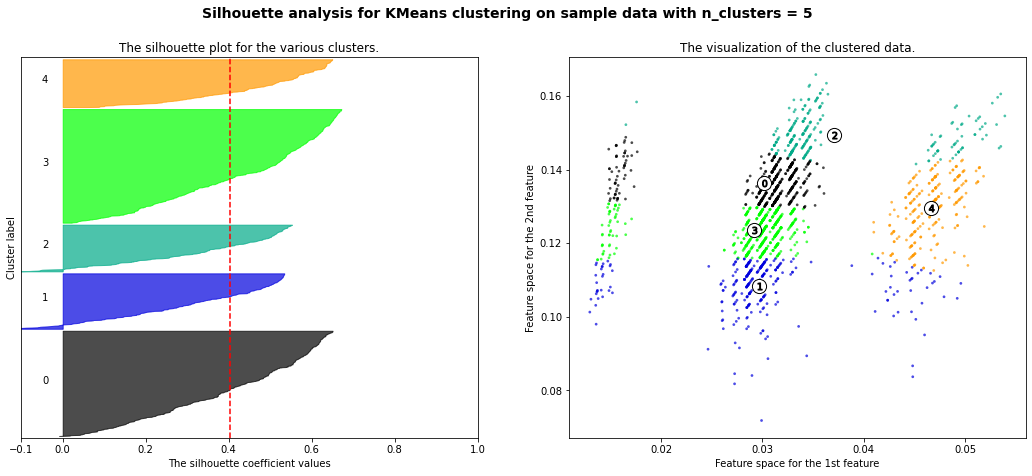

For n_clusters = 6 The silhouette_score is : 0.40872869217991675


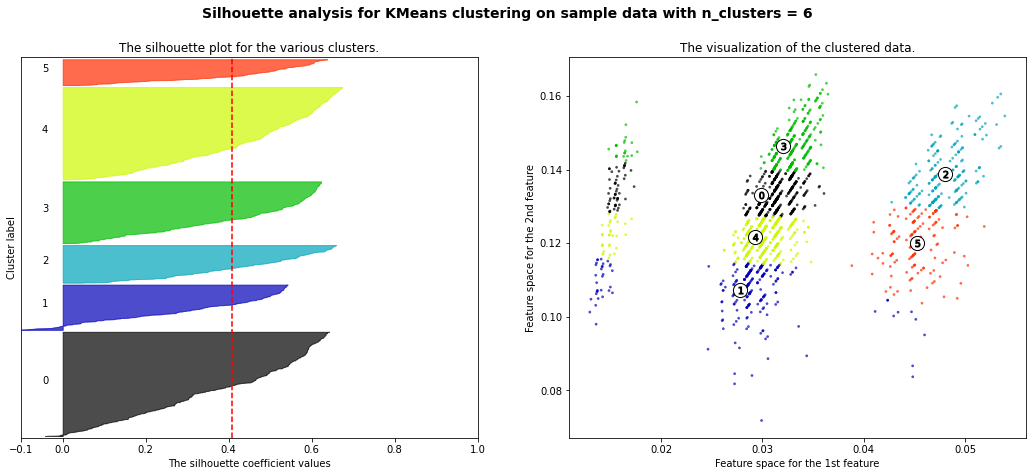

For n_clusters = 7 The silhouette_score is : 0.45651331943624407


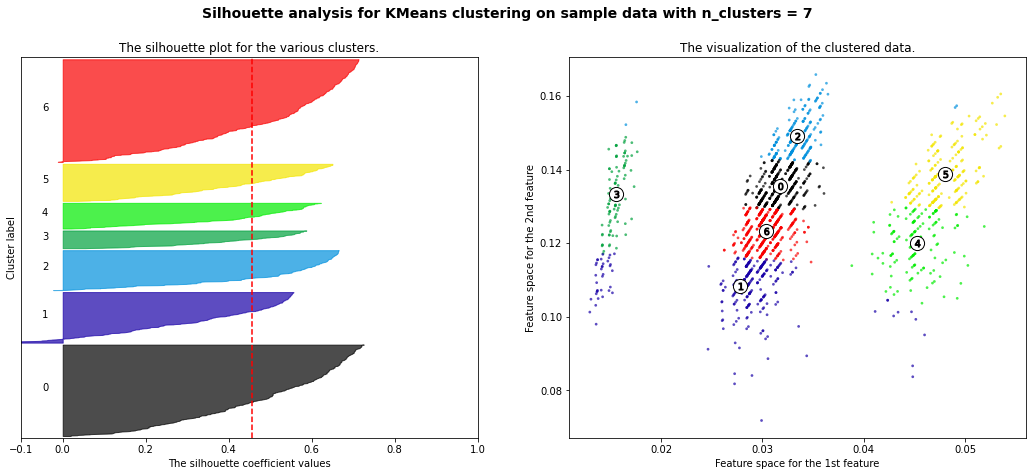

For n_clusters = 8 The silhouette_score is : 0.4541495122175492


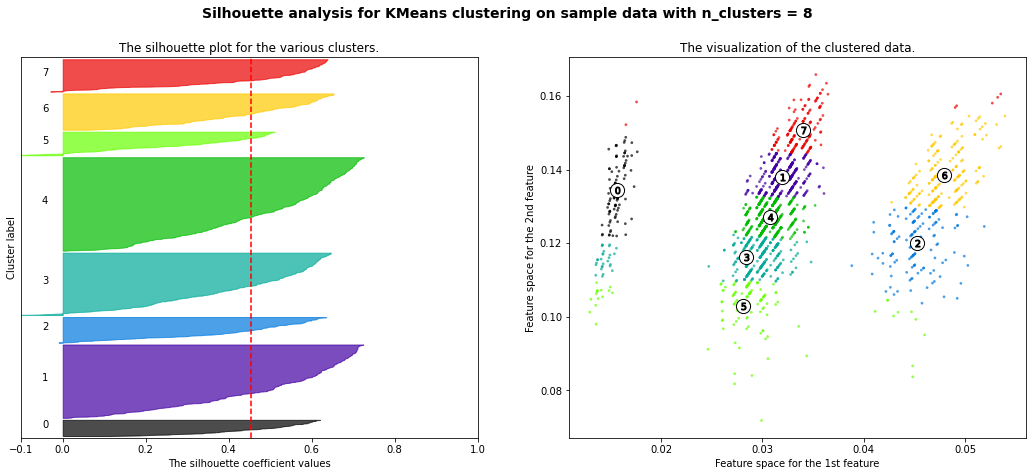

For n_clusters = 9 The silhouette_score is : 0.46760781973295695


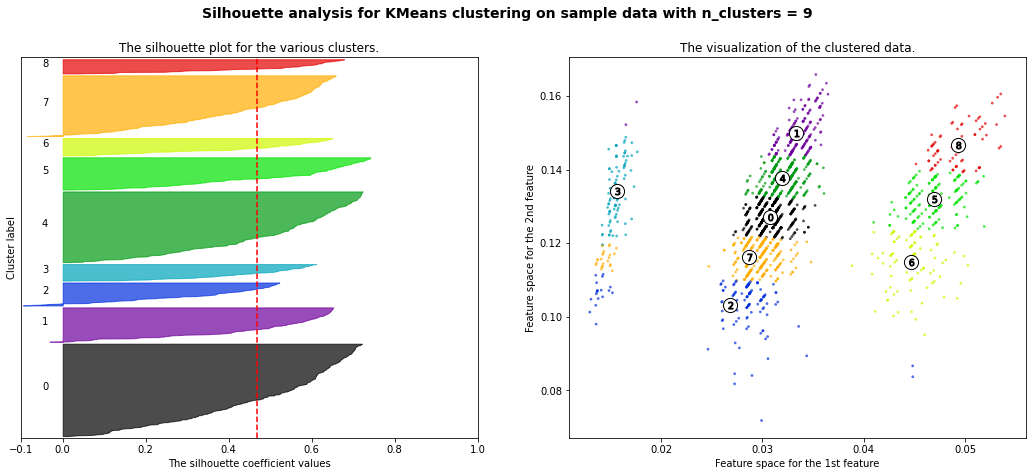

In [154]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
cols=["Delivery_avg","Delivery_Money","Money"]
scores=[]
for name_col in cols:
    df_test=pd.DataFrame({name_col:data_scaled[name_col],"Rate":data_scaled["Rate"]})
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++',random_state=10)
        cluster_labels = clusterer.fit_predict(df_test)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(df_test, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The silhouette_score is :", silhouette_avg)
        scores.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df_test, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette coefficient of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(data_scaled[name_col],data_scaled["Rate"], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

<font color='black'>Other examples  that show the inability to cluster the restaurants with other properties